In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


%matplotlib inline

In [2]:
westhimal = pd.read_csv('1_western_himal_Qstl_m3.csv', index_col = 0).rename(columns = {'Qstl':'Qstl_westhimal'})
tibetinterior = pd.read_csv('13_tibetinterior_Qstl_m3.csv', index_col = 0).rename(columns = {'Qstl':'Qstl_tibetinterior'})
easterntsh = pd.read_csv('19_easterntsh_Qstl_m3.csv', index_col = 0).rename(columns = {'Qstl':'Qstl_easterntsh'})

together = westhimal.join([tibetinterior,easterntsh])

In [3]:
## group and summarise: 




In [4]:

easterntsh.columns

Index(['Qstl_easterntsh'], dtype='object')

## monthly: 

In [5]:
## west himalaya 


## unite here: 
sediments = westhimal

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
qstl_area = pd.DataFrame()
qstl_area['Qstl'] = sediments.Qstl_westhimal*cf
# qstl_area.index = sedimentout.D

# qstl_area.set_index('D')
qstl_area.index = pd.to_datetime(qstl_area.index)

sym = qstl_area.resample('m').sum()            # sediment yeld month 
symm_westernhimal = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 

symm_westernhimal = symm_westernhimal.rename(columns = {'Qstl':'Qstl_westhimal'})

In [6]:
## interior tibet 

## unite here: 
sediments = tibetinterior

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
qstl_area = pd.DataFrame()
qstl_area['Qstl'] = sediments.Qstl_tibetinterior*cf
# qstl_area.index = sedimentout.D

# qstl_area.set_index('D')
qstl_area.index = pd.to_datetime(qstl_area.index)

sym = qstl_area.resample('m').sum()            # sediment yeld month 
symm_interiortibet = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 

symm_interiortibet = symm_interiortibet.rename(columns = {'Qstl':'Qstl_tibetinterior'})

In [7]:
## eastern tian shan

## unite here: 
sediments = easterntsh

# get area from parameters files: 
area = 4.83
cf = (area*10**6) * 10**-3   # km2 to m2 and mm to m

# qstl_area = pd.DataFrame(data = sedimentout.Qstl*cf, index=pd.to_datetime(sedimentout.index))
qstl_area = pd.DataFrame()
qstl_area['Qstl'] = sediments.Qstl_easterntsh*cf
# qstl_area.index = sedimentout.D

# qstl_area.set_index('D')
qstl_area.index = pd.to_datetime(qstl_area.index)

sym = qstl_area.resample('m').sum()            # sediment yeld month 
symm_easterntsh = sym.groupby(by=sym.index.month).mean()  # sediment yeld month mean 

symm_easterntsh = symm_easterntsh.rename(columns = {'Qstl':'Qstl_easterntsh'})

In [8]:
df = symm_westernhimal.join([symm_interiortibet, symm_easterntsh]).reset_index()
df.head()

,D,Qstl_westhimal,Qstl_tibetinterior,Qstl_easterntsh
0,1,2.683807e+08,0.0,0.000000e+00
1,2,6.550811e+08,0.0,0.000000e+00
2,3,9.297600e+08,0.0,2.993674e+06
3,4,3.428527e+08,0.0,4.034201e+07
4,5,9.414340e+07,0.0,6.073718e+07


## plots:

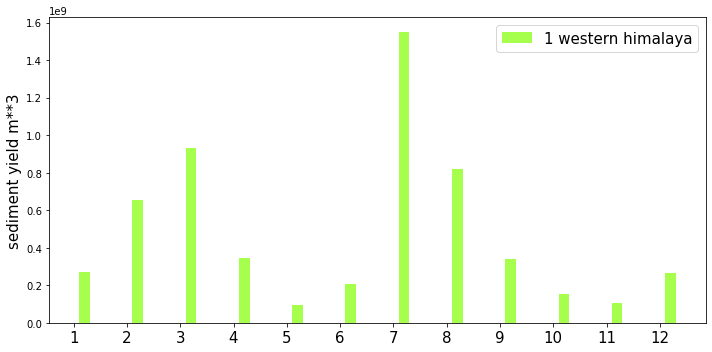

In [10]:
## figure to count all lakes

fig, ax = plt.subplots(figsize=(10, 5))

width = 0.2
ax.bar(x=df.D+0.2, height=df.Qstl_westhimal, width=width, label='1 western himalaya',  alpha=0.7, color='chartreuse')
# ax.bar(x=df.D-0.2,     height=df.Qstl_tibetinterior, width=width,label='13 interior tibetian mnts' , alpha=0.7, color= 'dodgerblue')
# ax.bar(x=df.D,     height=df.Qstl_easterntsh, width=width,label='19 eastern tian shan' , alpha=0.7, color= 'orange')


ax.set_xticks(df.D)
ax.set_xticklabels(df.D, fontsize=15)#rotation=45)
ax.legend(fontsize=15, )
ax.set_ylabel('sediment yield m**3', fontsize=15)
fig.tight_layout()

# fig.savefig('sed_yeld_3regions.pdf', bbox_inches='tight')

In [29]:
# df.to_csv('monthly_mean_sediment_yeild_m3.csv')

## plots: 


<AxesSubplot:>

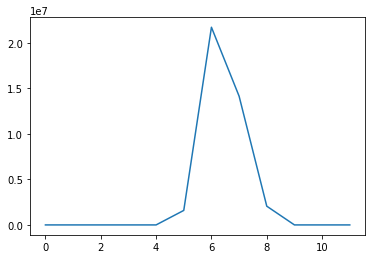

In [30]:
df.Qstl_tibetinterior.plot()

In [31]:
df.Qstl_tibetinterior

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     1.593713e+06
6     2.171920e+07
7     1.414324e+07
8     2.057793e+06
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
Name: Qstl_tibetinterior, dtype: float64

In [32]:
# easttsh_sed

## climate vs sed yeild

In [33]:
easttsh_sed = pd.read_csv('/Users/varyabazilova/Desktop/sedcas/varya_project/19_Eastern_Tien_Shan/Hydro.out', index_col = 0)
easttsh_hydr = pd.read_csv('/Users/varyabazilova/Desktop/sedcas/varya_project/19_Eastern_Tien_Shan/Sediment.out', index_col = 0)

easttsh = easttsh_sed.join(easttsh_hydr)

In [34]:
easttsh.head()

,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,Q0,Q10,Q25,Q50,Q75,Q90,Q100,Qstl
D,,,,,,,,,,,,,,,,,,
1980-01-01 00:00:00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.031281,-12.92365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-01 01:00:00,0.0,0.0,0.0,0.0,0.022126,0.022126,0.00000,0.0,0.022126,-14.07618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-01 02:00:00,0.0,0.0,0.0,0.0,0.037385,0.015259,0.00000,0.0,0.015259,-14.28500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-01 03:00:00,0.0,0.0,0.0,0.0,0.049593,0.012208,0.00000,0.0,0.012208,-14.21647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-01 04:00:00,0.0,0.0,0.0,0.0,0.058748,0.009155,0.00604,0.0,0.009155,-13.98212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


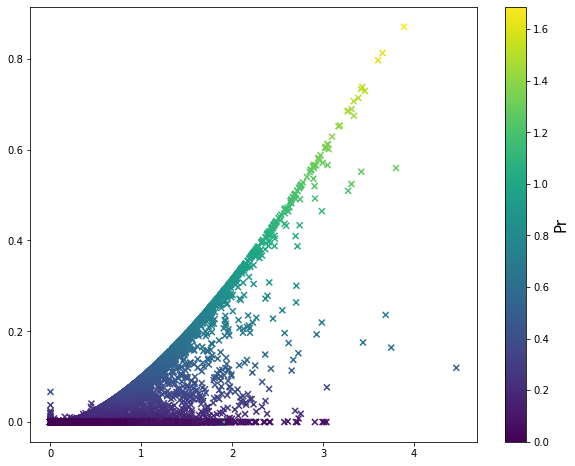

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

plot = ax.scatter(easttsh.Pr, easttsh.Qstl, c = easttsh.Q, marker = 'x',)
# plt.xlabel('Q', fontsize=15)
# plt.ylabel('Qstl', fontsize=15)

colorbar = plt.colorbar(plot)
colorbar.set_label('Pr', fontsize=15)


In [36]:
innertibet_sed = pd.read_csv('/Users/varyabazilova/Desktop/sedcas/varya_project/13_Tibetan_Interior_Mountains/Hydro.out', index_col = 0)
innertibet_hydr = pd.read_csv('/Users/varyabazilova/Desktop/sedcas/varya_project/13_Tibetan_Interior_Mountains/Sediment.out', index_col = 0)

innertibet = innertibet_sed.join(innertibet_hydr)

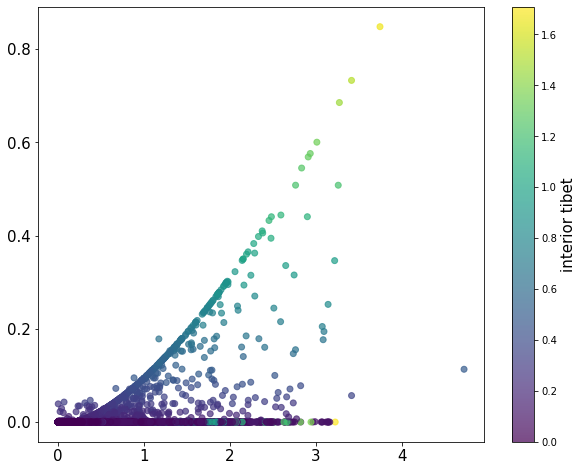

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))

# inner tibet

plot = ax.scatter(innertibet.Pr, innertibet.Qstl, c = innertibet.Q, alpha=0.7, marker = 'o')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

colorbar = plt.colorbar(plot)
colorbar.set_label('interior tibet', fontsize=15)

# eastern tsh

# plot2 = ax.scatter(easttsh.Pr, easttsh.Qstl, c = easttsh.Q, marker = 'x', alpha=0.7, cmap = cm.Blues)

# colorbar2 = plt.colorbar(plot2)
# colorbar2.set_label('eastern tian shan', fontsize=15)



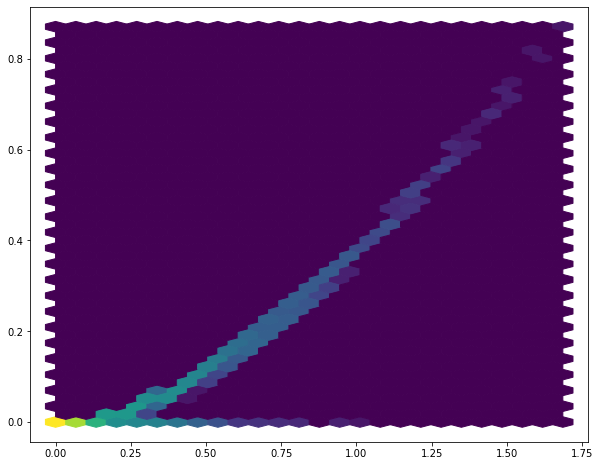

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hexbin(easttsh.Q, easttsh.Qstl, gridsize=(25,25), bins = 'log')
 
